# "Can you predict Breast Cancer based on the lump found?"
Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

In [42]:
# Dependencies
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import requests

# Objective
### We want to analyse the data to see if Breast Cancer could be predicted based on the lump found.

In [7]:
# File Path
bCancer_data_file = "Breast_cancer_data.csv"

# Read CSV
breastCancer_data = pd.read_csv(bCancer_data_file)

# Show Data
breastCancer_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


### Data dictionary
#### diagnosis: The diagnosis of breast tissues (1 = malignant, 0 = benign)
#### mean_radius: mean of distances from center to points on the perimeter
#### mean_texture: standard deviation of gray-scale values
#### mean_perimeter: mean size of the core tumor
#### mean_area
#### mean_smoothness: mean of local variation in radius lengths

In [10]:
#Check for null values in the dataframe
breastCancer_data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

## Analyze the data

In [11]:
breastCancer_data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


## Check the diagnosis(Malignant and Benign)

In [12]:
count = breastCancer_data.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

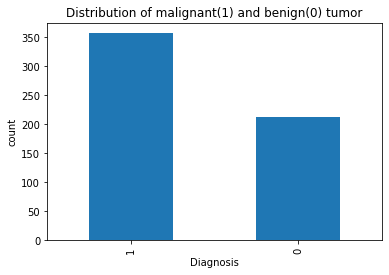

In [14]:
#Visualize the Diagnosis
count.plot(kind='bar')
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count");

### Check the corelational matrix

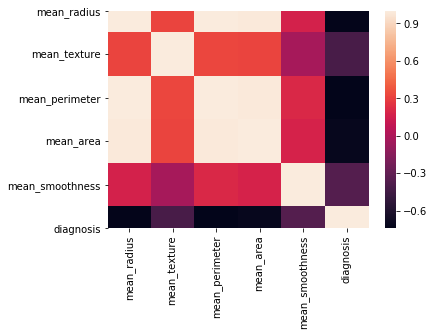

In [50]:
cor =breastCancer_data.corr()
sns.heatmap(cor, square = True) #Plot the correlation as heat map

As you can see above, we obtain the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents a high correlation.

In [16]:
!pip install sklearn --upgrade


Requirement already up-to-date: sklearn in c:\users\aguha\anaconda3\lib\site-packages (0.0)


In [19]:
breastCancer_data.columns.values

array(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'], dtype=object)

In [24]:
# Set features. This will also be used as your x values.
features=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness']
X = breastCancer_data[features]

In [25]:
# Use Diagnosis as the Target. The main motive of our predictor is to correctly predict on the basis of the data available, if the breast cancer is
#Malignant(1) i.e. Harmful ,or
#Benign(0) i.e. Not Harmful.
#Hence, our target class is Diagnosis

y=breastCancer_data["diagnosis"]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Model
model =  LogisticRegression()

#Fit
model.fit(X_train, y_train)


C:\Users\aguha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#Score. Check for Overfitting
model.score(X_train, y_train)
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8991
Test set score: 0.9371


In [33]:
#Predict
y_pred = model.predict(X_test)

In [34]:
#Accuracy

#The predicted values and the actual test values are compared to compute the accuracy.
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)

Accuracy score using Logistic Regression: 93.7062937062937


In [35]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[49,  5],
       [ 4, 85]], dtype=int64)

## Binary classification using K Nearest Neighbours
KNN Algorithm is based on feature similarity, i.e how closely out-of-sample features resemble our training set determines how we classify a given data point.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
#Predict
y_pred = clf.predict(X_test)

In [39]:
#Accuracy 
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN:", acc*100)


Accuracy score using KNN: 91.6083916083916


In [40]:
confusion_matrix(y_test, y_pred)

array([[46,  8],
       [ 4, 85]], dtype=int64)